## 序列模型


想象一下你正在看网飞（Netflix，一个国外的视频网站）上的电影。 作为一名忠实的用户，你对每一部电影都给出评价， 毕竟一部好电影需要更多的支持和认可。 然而事实证明，事情并不那么简单。 随着时间的推移，人们对电影的看法会发生很大的变化。 事实上，心理学家甚至对这些现象起了名字：

锚定（anchoring）效应：基于其他人的意见做出评价。 例如，奥斯卡颁奖后，受到关注的电影的评分会上升，尽管它还是原来那部电影。 这种影响将持续几个月，直到人们忘记了这部电影曾经获得的奖项。 结果表明（ [Wu et al., 2017]），这种效应会使评分提高半个百分点以上。

享乐适应（hedonic adaption）：人们迅速接受并且适应一种更好或者更坏的情况 作为新的常态。 例如，在看了很多好电影之后，人们会强烈期望下部电影会更好。 因此，在许多精彩的电影被看过之后，即使是一部普通的也可能被认为是糟糕的。

季节性（seasonality）：少有观众喜欢在八月看圣诞老人的电影。

有时，电影会由于导演或演员在制作中的不当行为变得不受欢迎。

有些电影因为其极度糟糕只能成为小众电影。Plan9from Outer Space和Troll2就因为这个原因而臭名昭著的。

简而言之，电影评分决不是固定不变的。 因此，使用时间动力学可以得到更准确的电影推荐 [Koren, 2009]。 当然，序列数据不仅仅是关于电影评分的。 下面给出了更多的场景：

在使用应用程序时，许多用户都有很强的特定习惯。 例如，在学生放学后社交媒体应用更受欢迎。在市场开放时股市交易软件更常用。

预测明天的股价要比过去的股价更困难，尽管两者都只是估计一个数字。 毕竟，先见之明比事后诸葛亮难得多。 在统计学中，前者（对超出已知观测范围进行预测）称为外推法（extrapolation）， 而后者（在现有观测值之间进行估计）称为内插法（interpolation）。

在本质上，音乐、语音、文本和视频都是连续的。 如果它们的序列被我们重排，那么就会失去原有的意义。 比如，一个文本标题“狗咬人”远没有“人咬狗”那么令人惊讶，尽管组成两句话的字完全相同。

地震具有很强的相关性，即大地震发生后，很可能会有几次小余震， 这些余震的强度比非大地震后的余震要大得多。 事实上，地震是时空相关的，即余震通常发生在很短的时间跨度和很近的距离内。

人类之间的互动也是连续的，这可以从微博上的争吵和辩论中看出。

## 模型

<img src='photo/xulie0.png'>

<img src='photo/xulie1.png'>

## 训练

tensor([-0.0072,  0.0113,  0.0089,  0.2534,  0.3879,  0.6112,  0.2099, -0.0997,
         0.1838, -0.0691, -0.1803,  0.1706, -0.2380, -0.1743,  0.2421,  0.3627,
         0.2363,  0.2587, -0.1163,  0.2632,  0.0560,  0.1244,  0.2280,  0.5320,
         0.3223,  0.3238,  0.6141,  0.0971,  0.1855,  0.5758,  0.2279,  0.5842,
         0.6830,  0.3624,  0.0993,  0.6572,  0.5400,  0.0702,  0.5383,  0.2076,
        -0.0091,  0.2746,  0.7307,  0.6425,  0.6954,  0.5814,  0.1468,  0.6709,
         0.6230,  0.5075,  0.2660,  0.3324,  0.3281,  0.4537,  0.5315,  0.4498,
         0.5067,  0.8004,  0.5963,  0.4448,  0.6306,  0.2575,  0.8023,  0.8756,
         0.8610,  0.1876,  0.5825,  0.4905,  0.5789,  1.1141,  0.3193,  0.7133,
         0.5228,  0.6952,  0.8167,  0.8361,  0.6264,  0.8633,  0.6511,  0.7524,
         0.9613,  0.6845,  1.0448,  0.9270,  0.4561,  0.8961,  0.6386,  0.4544,
         0.7573,  0.6691,  1.2200,  1.1157,  0.8346,  0.7138,  0.6830,  0.6574,
         1.0894,  0.4762,  0.7724,  0.55

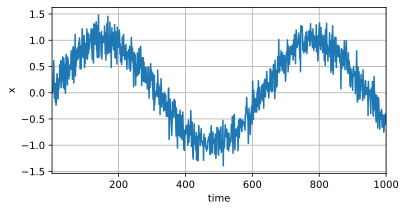

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

T = 1000  # 产生1000个点

time = torch.arange(1,T+1,dtype=torch.float32)
x = torch.sin(0.01*time) + torch.normal(0,0.2,(T,))    # 加一些噪声，在这里产生了1000个数据存放在一维数组里
d2l.plot(time,[x],'time','x',xlim=[1,1000],figsize=(6,3))
x

In [2]:
tau = 4                         # x_t 只与前四个变量相关
features = torch.zeros(T-tau,tau)
print(features.shape)
for i in range(tau):
    features[:,i] = x[i:T-tau+i]    # 每一行的第0个为[0-996],每一行的第二个为[1-997]
print(features)

labels = x[tau:].reshape((-1,1))    # 任意行，一列（任意*1=nn），从第5个元素开始，每一个是标签
print(labels.shape)

torch.Size([996, 4])
tensor([[-0.0072,  0.0113,  0.0089,  0.2534],
        [ 0.0113,  0.0089,  0.2534,  0.3879],
        [ 0.0089,  0.2534,  0.3879,  0.6112],
        ...,
        [-0.6984, -0.4379, -0.4740, -0.4100],
        [-0.4379, -0.4740, -0.4100, -0.5993],
        [-0.4740, -0.4100, -0.5993, -0.6011]])
torch.Size([996, 1])


In [3]:
batch_size ,n_train = 16,600        # 在这里只选取前600个元素进行训练，批量大小是16
train_iter = d2l.load_array((features[:n_train],labels[:n_train]),batch_size,is_train=True)
train_iter

In [4]:
# 初始化网络权重
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)   # 使用xavier方法进行初始化

def get_net():
    net = nn.Sequential(
        nn.Linear(4,10),    # 输入的特征数目有4个
        nn.ReLU(),
        nn.Linear(10,1),
    )
    net.apply(init_weights)
    return net

# 平方损失。注意：MSELoss计算平方误差时不带系数1/2
loss = nn.MSELoss(reduction='none')

In [9]:
# 开始训练

def train(net,train_iter,loss,epochs,lr):
    trainer = torch.optim.Adam(net.parameters(),lr)     # 内置Adam优化器
    for epoch in range(epochs):
        for X,y in train_iter:
            trainer.zero_grad()         # 每次训练梯度清零
            l = loss(net(X),y)          
            l.mean().backward()          # 反向传播
            trainer.step()              # 更新参数
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')   
net = get_net()
train(net,train_iter,loss,5,0.01)     

epoch 1, loss: 0.062576
epoch 2, loss: 0.052869
epoch 3, loss: 0.052378
epoch 4, loss: 0.053264
epoch 5, loss: 0.051460


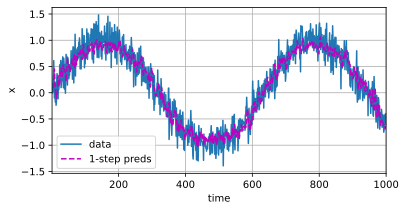

In [10]:
onestep_preds = net(features)       # 训练好的网络来预测所有数据
d2l.plot([time, time[tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy()], 'time',
         'x', legend=['data', '1-step preds'], xlim=[1, 1000],
         figsize=(6, 3))

如上图，效果还不错，因为我们对之后的时间进行了预测，其结果看起来仍是可信的。然而有一个小问题：如果数据观察序列的时间步只到604，我们需要一步一步向前迈进：
$$
\begin{split}\hat{x}_{605} = f(x_{601}, x_{602}, x_{603}, x_{604}), \\
\hat{x}_{606} = f(x_{602}, x_{603}, x_{604}, \hat{x}_{605}), \\
\hat{x}_{607} = f(x_{603}, x_{604}, \hat{x}_{605}, \hat{x}_{606}),\\
\hat{x}_{608} = f(x_{604}, \hat{x}_{605}, \hat{x}_{606}, \hat{x}_{607}),\\
\hat{x}_{609} = f(\hat{x}_{605}, \hat{x}_{606}, \hat{x}_{607}, \hat{x}_{608}),\\
\ldots\end{split}
$$

通常，对于直到$x_t$的观测序列，其在时间步处$x_{t+K}$的预测输出$\hat x_{t+k}$
 称为步预测（k-step-ahead-prediction）。 由于我们的观察已经到了$x_{604}$，它的步预测是$\hat x_{604+k}$
。 换句话说，我们必须使用我们自己的预测（而不是原始数据）来进行多步预测。 让我们看看效果如何。

In [15]:
multistep_preds = torch.zeros(T)    # 生成1000个序列
multistep_preds[:n_train+tau] = x[:n_train+tau]     # 原始数据保存下来
multistep_preds 
# print(multistep_preds)
for i in range(n_train+tau,T):
    multistep_preds[i] = net(
        multistep_preds[i-tau:i].reshape((1,-1))    # 一行任意列，这里相当于用生成的数据不断来预测后面的数据
    )
multistep_preds

tensor([-0.0072,  0.0113,  0.0089,  0.2534,  0.3879,  0.6112,  0.2099, -0.0997,
         0.1838, -0.0691, -0.1803,  0.1706, -0.2380, -0.1743,  0.2421,  0.3627,
         0.2363,  0.2587, -0.1163,  0.2632,  0.0560,  0.1244,  0.2280,  0.5320,
         0.3223,  0.3238,  0.6141,  0.0971,  0.1855,  0.5758,  0.2279,  0.5842,
         0.6830,  0.3624,  0.0993,  0.6572,  0.5400,  0.0702,  0.5383,  0.2076,
        -0.0091,  0.2746,  0.7307,  0.6425,  0.6954,  0.5814,  0.1468,  0.6709,
         0.6230,  0.5075,  0.2660,  0.3324,  0.3281,  0.4537,  0.5315,  0.4498,
         0.5067,  0.8004,  0.5963,  0.4448,  0.6306,  0.2575,  0.8023,  0.8756,
         0.8610,  0.1876,  0.5825,  0.4905,  0.5789,  1.1141,  0.3193,  0.7133,
         0.5228,  0.6952,  0.8167,  0.8361,  0.6264,  0.8633,  0.6511,  0.7524,
         0.9613,  0.6845,  1.0448,  0.9270,  0.4561,  0.8961,  0.6386,  0.4544,
         0.7573,  0.6691,  1.2200,  1.1157,  0.8346,  0.7138,  0.6830,  0.6574,
         1.0894,  0.4762,  0.7724,  0.55

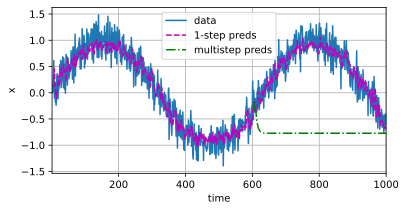

In [16]:
d2l.plot([time, time[tau:], time[n_train + tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy(),
          multistep_preds[n_train + tau:].detach().numpy()], 'time',
         'x', legend=['data', '1-step preds', 'multistep preds'],
         xlim=[1, 1000], figsize=(6, 3))

如上图，可以看到效果很差。经过几个预测步骤之后，预测结果很快就衰减到了一个常数。为什么这个算法效果这么差呢？——错误的累计：

假设步骤一之后，我们积累了一些错误$\epsilon_1 = \bar\epsilon$
于是，步骤2的输入被扰动了$\epsilon_1$,结果积累的误差是依照次序的$\epsilon_2 = \bar\epsilon + c \epsilon_1$,其中c是某个常数。

例如，未来24小时的天气预报往往相当准确， 但超过这一点，精度就会迅速下降。 我们将在本章及后续章节中讨论如何改进这一点。

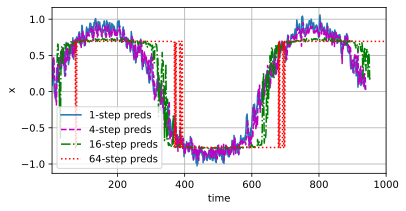

In [18]:
max_steps = 64

features = torch.zeros((T - tau - max_steps + 1, tau + max_steps))
# 列i（i<tau）是来自x的观测，其时间步从（i）到（i+T-tau-max_steps+1）
for i in range(tau):
    features[:, i] = x[i: i + T - tau - max_steps + 1]

# 列i（i>=tau）是来自（i-tau+1）步的预测，其时间步从（i）到（i+T-tau-max_steps+1）
for i in range(tau, tau + max_steps):
    features[:, i] = net(features[:, i - tau:i]).reshape(-1)

steps = (1, 4, 16, 64)
d2l.plot([time[tau + i - 1: T - max_steps + i] for i in steps],
         [features[:, (tau + i - 1)].detach().numpy() for i in steps], 'time', 'x',
         legend=[f'{i}-step preds' for i in steps], xlim=[5, 1000],
         figsize=(6, 3))